In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

from Lib.BEM_Solver.BEM_2D import *

## BEM Solver Module

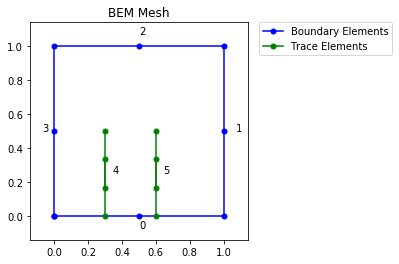

[Solution Results]
Number of boundary elements:4
Coordinates&Boundary conditions of boundary elements:
Point	X		Y		Pressure	Left Flux	Right flux
(1)1	0.000		0.000		100.000		81.820		-25.000
(1)2	0.500		0.000		77.392		-25.000		-25.000
(2)3	1.000		0.000		70.963		-25.000		0.000
(2)4	1.000		0.500		77.178		0.000		0.000
(3)5	1.000		1.000		70.963		0.000		-25.000
(3)6	0.500		1.000		77.392		-25.000		-25.000
(4)7	0.000		1.000		100.000		-25.000		81.820
(4)8	0.000		0.500		100.000		34.551		34.551


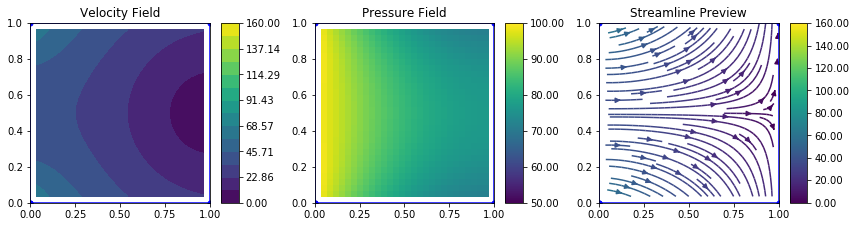

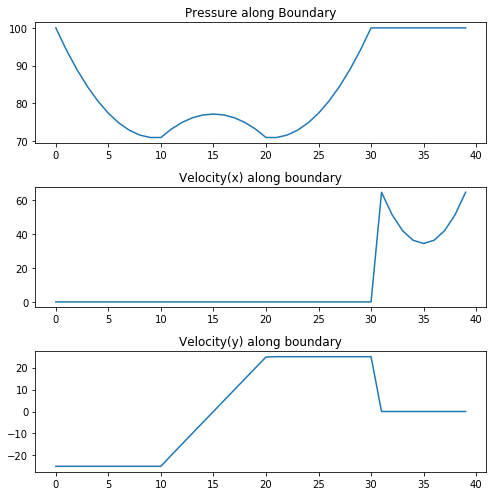

In [2]:
BEM_Case1=BEM2D()

#1.Build Mesh
Boundary_vert=[(0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0)] #Anti-clock wise for internal domain
Trace_vert=[((0.3, 0.0), (0.3, 0.5)),((0.6, 0.0), (0.6, 0.5))]#No direction requirement
element_esize=1.0
element_tszie=0.2

BEM_Case1.set_Mesh(Boundary_vert,Trace_vert,element_esize,element_tszie,Type="Quad")

#2.Set Boundary condition
bc0=[(3,100)]
bc1=[(2,-25),(0,-25)]
BEM_Case1.set_BoundaryCondition(DirichletBC=bc0,NeumannBC=bc1)
#BEM_Case1.print_debug()

#3. Solve and plot
BEM_Case1.DFN=0
BEM_Case1.Solve()
PUV=BEM_Case1.plot_Solution(v_range=(0,160),p_range=(50,100))
PUV2=BEM_Case1.plot_SolutionBD()

## Mesh Module

In [3]:
from Lib.Mesh.TriMesh2D import *

In [5]:
#Mesh2D matlab backend-Win
import transplant #Matlab processer
mlab = transplant.Matlab(arguments=('-nosplash','-nodesktop','-nojvm','-minimize'))
mlab.addpath(r'G:\2.MeshGenerator-0428\mesh2d',nargout=0)

Unrecognized MATLAB option "minimize".

                            < M A T L A B (R) >
                  Copyright 1984-2016 The MathWorks, Inc.
                   R2016b (9.1.0.441655) 64-bit (glnxa64)
                             September 7, 2016

 
For online documentation, see http://www.mathworks.com/support
For product information, visit www.mathworks.com.
 

	Student License -- for use by students to meet course requirements
	and perform academic research at degree granting institutions only.

> In path (line 109)
  In addpath (line 88)
  In transplant_remote (line 136) 
> In path (line 109)
  In addpath (line 88)
  In transplant_remote (line 136) 


In [4]:
#Mesh2D matlab backend-Linux
import transplant #Matlab processer
mlab = transplant.Matlab(arguments=('-nosplash','-nodesktop','-nojvm','-minimize'))
mlab.addpath(r'/media/binwang/9CF2A927F2A9069C/2.MeshGenerator-0428/mesh2d',nargout=0)

Unrecognized MATLAB option "minimize".

                            < M A T L A B (R) >
                  Copyright 1984-2016 The MathWorks, Inc.
                   R2016b (9.1.0.441655) 64-bit (glnxa64)
                             September 7, 2016

 
For online documentation, see http://www.mathworks.com/support
For product information, visit www.mathworks.com.
 

	Student License -- for use by students to meet course requirements
	and perform academic research at degree granting institutions only.




 Refine triangulation...

 -------------------------------------------------------
      |ITER.|          |CDT1(X)|          |CDT2(X)|     
 -------------------------------------------------------
> In deltri2 (line 90)
  In refine2>cdtbal0 (line 297)
  In refine2 (line 247)
  In build_mesh (line 37)
  In transplant_remote (line 126) 
          6                 50                 24
         10                 50                238
         13                 50                254


 Smooth triangulation...

 -------------------------------------------------------
      |ITER.|          |MOVE(X)|          |DTRI(X)|     
 -------------------------------------------------------
          4                 47                254
          8                 14                254

Vertices Number:148
Element Number:254


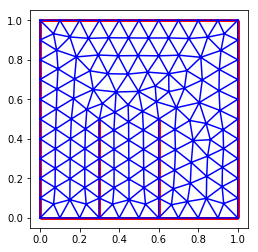

In [5]:
Mesh=Mesh2D(Boundary_vert,Trace_vert,element_size=0.1)
Mesh.MeshBuild(Library="Mesh2D",matlab=mlab)

Refinement ON!

 Refine triangulation...

 -------------------------------------------------------
      |ITER.|          |CDT1(X)|          |CDT2(X)|     
 -------------------------------------------------------
> In deltri2 (line 90)
  In refine2>cdtbal0 (line 297)
  In refine2 (line 247)
  In lfshfn2 (line 44)
  In build_mesh (line 24)
  In transplant_remote (line 126) 
          3                 88                142
         10                106                264
         10                106                264


 Refine triangulation...

 -------------------------------------------------------
      |ITER.|          |CDT1(X)|          |CDT2(X)|     
 -------------------------------------------------------
> In deltri2 (line 90)
  In refine2>cdtbal0 (line 297)
  In refine2 (line 247)
  In build_mesh (line 32)
  In transplant_remote (line 126) 
          5                116                142
         10                120                576
         13                122     

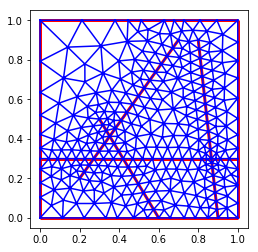

In [82]:
#Trace_vert=[((0.6, 0.0), (0.3, 0.5)),((0.2, 0.2), (0.7, 0.9)),((0.9, 0.0), (0.8, 0.9)),((0.0, 0.3), (1.0, 0.3))]
Mesh=Mesh2D(Boundary_vert,Trace_vert,element_size=1,trace_element_size=0.15/3)
Mesh.MeshBuild(Library="Mesh2D",matlab=mlab,refinement=0.3)

## Streamline Tracing Module

In [6]:
#4. Assign the pressure, velocity to mesh nodes
NumNodes=len(Mesh.mesh_points)
for i in range(NumNodes):
    Pts=Mesh.mesh_points[i]
    PUV=BEM_Case1.get_Solution(Pts)
    Mesh.p[i]=PUV[0]
    Mesh.vx[i]=PUV[1]
    Mesh.vy[i]=PUV[2]

In [7]:
from Lib.Streamline.Streamline_Tracing import *
SLs_Case1=Streamlines()

20 Streamlines genetrated.


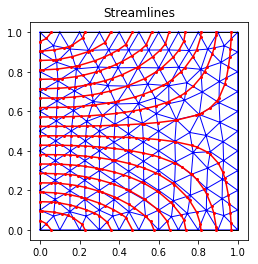

In [14]:
#Define the start edge,streamline number
StartPts=SLs_Case1.initSL(NSL=20,BDid=3,Meshobj=Mesh)

#Trace streamline
SLs,TOFs=SLs_Case1.traceSLs()

#PLot streamline
SLs_Case1.plotSLs(SLs,mode=1)

Current 0 [ 0.          0.95238095]


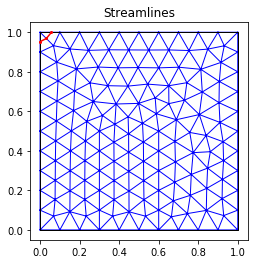

In [11]:
#Function test
for i in range(SLs_Case1.NumSL):
    print("Current",i,StartPts[i])
    SLs_Case1.trace1SL(Pts0=StartPts[i],TOF0=0.0,debug=1)

In [12]:
#TOFs of the end point
for i in range(SLs_Case1.NumSL):
    print(TOFs[i][-1])

0.00258650673352
0.00622163687497
0.00975541290583
0.0134975416101
0.017716594757
0.0225056923058
0.02832581748
0.035751237464
0.0465118496613
0.069646587301
0.0696082135687
0.0465809638308
0.0357344816928
0.0282807274354
0.0225050107564
0.0177001711459
0.0134790448398
0.00973075381
0.00622673568328
0.00257940757324
